# Lab 6

## Objectives
To construct and study the frequency response of the power amplifier (PA) subsystem. 

### Frequency response measurement

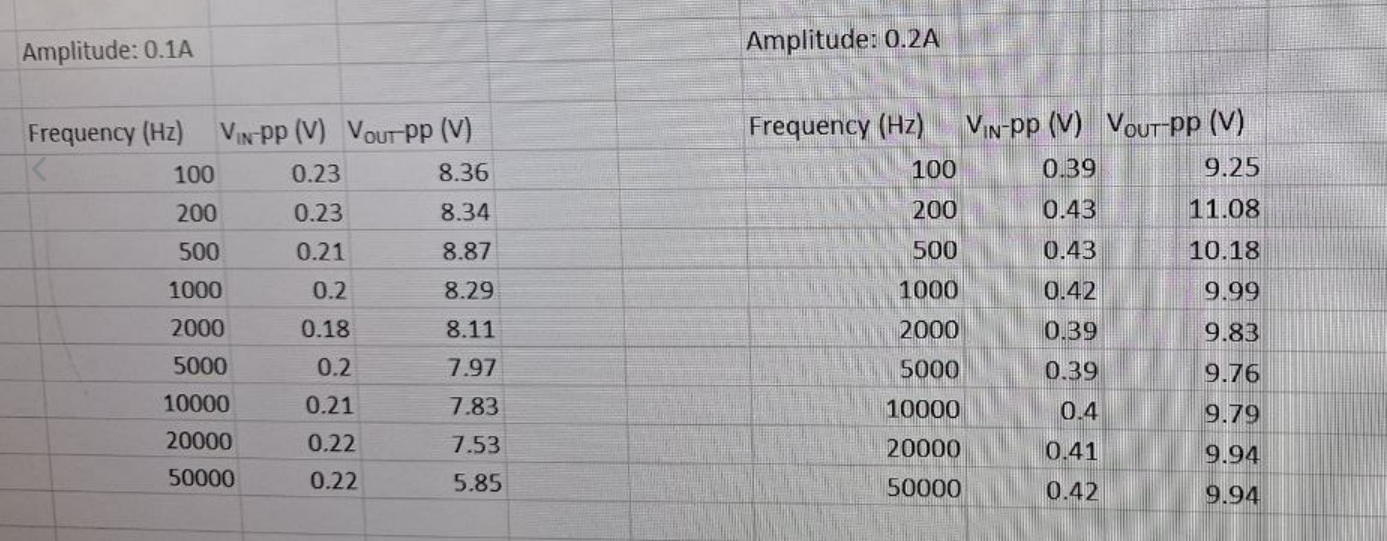

### PA frequency response characterization

In [3]:
import numpy as np 
import plotly.graph_objs as go 
from plotly.graph_objs.scatter.marker import Line
import math
 
frequency = np.array([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000])  
v_IN_01 = np.array([0.23, 0.23, 0.21, 0.2, 0.18, 0.21, 0.22, 0.22, 0.22]) 
v_OUT_01 = np.array([8.36, 8.34, 8.87, 8.29, 8.11, 7.97, 7.83, 7.53, 5.85]) 
v_IN_02 = np.array([0.39, 0.43, 0.43, 0.42, 0.39, 0.39, 0.4, 0.41, 0.42]) 
v_OUT_02 = np.array([9.25, 11.08, 10.18, 9.99, 9.83, 9.76, 9.79, 9.94, 9.94]) 

gain_01 = 20*np.log10(v_OUT_01/v_IN_01)
gain_02 = 20*np.log10(v_OUT_02/v_IN_02)

fig = go.Figure() 
fig.update_xaxes(type='log')
fig.add_trace(go.Scatter(x=frequency, y=gain_01, mode='markers', name='0.1V<sub>amp</sub>')) 
fig.add_trace(go.Scatter(x=frequency, y=gain_02, mode='markers', name='0.2V<sub>amp</sub>')) 
fig.update_layout(xaxis_title='Frequency (Hz)', yaxis_title='Gain (dB)') 

coef = np.polyfit(frequency, gain_01, deg=1) # deg=1 for order 1 polynomial (linear)
fit = coef[0]*frequency + coef[1]
lab_temp = 25 # laboratory temperature
fig.add_trace(go.Scatter(x=frequency, y=fit, mode='lines', line=dict(dash='dash'),
 name='Best fit'))
coef = np.polyfit(frequency, gain_02, deg=1) # deg=1 for order 1 polynomial (linear)
fit = coef[0]*frequency + coef[1]
lab_temp = 25 # laboratory temperature
fig.add_trace(go.Scatter(x=frequency, y=fit, mode='lines', line=dict(dash='dash'),
 name='Best fit'))

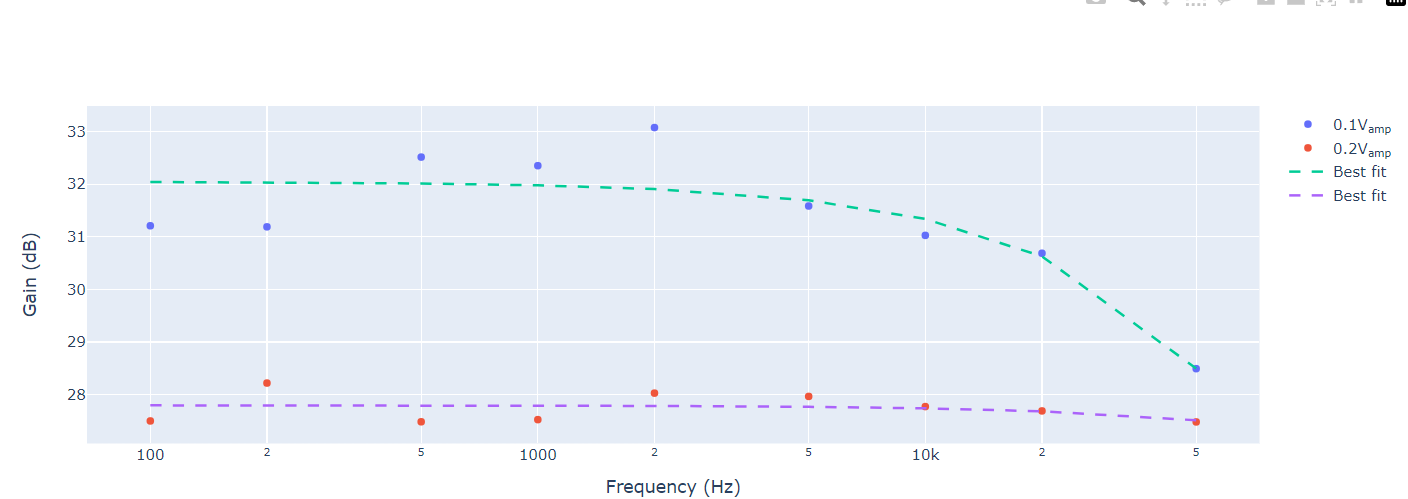

In [6]:
total_gain1 = 0.0
total_gain2 = 0.0
print("Gain 1:", gain_01)
for i in range(len(gain_01)):
    total_gain1 += gain_01[i]
    total_gain2 += gain_02[i]

print("Average Gain 1", total_gain1/9.0 )
print("Average Gain 2", total_gain2/9.0 )

Gain 1: [31.20956883 31.18876429 32.5140865  32.3504907  33.07496698 31.58478053
 31.02678162 30.68744591 28.49466371]
Average Gain 1 31.34794989704426
Average Gain 2 27.742400876383527


With an 0.1V amptitude, the gain across the frequencies have an average of 31.4dB.

With an 0.2V Amptitude, the gain across the frequecues have an average of 27.7dB.

This can be justified as at higher amptitudem the noise will also be amplified. This could result in the gain being lower from the typical 34dB. The SNR between 0.1V and 0.2V will not  be affecting much even though higher amptitude improves the SNR.

From the results, it seems that with higher amptitude will result in a lower gain from 34dB.

It can be seen from the graph that the gain drops more sharply after 2kHz. From the LM380N datasheet, it has a GBWP of 100kHz. When divided by 34dB/50 voltage gain ratio. the characteristic frequency is 2kHz. This is true from results

### Open-Ended Questions
#### **How much current is flowing through the output stage ground (GND2) when the PA is driven with the loudest volume?**

At 0.1V and 200Hz, current is 112mA

At 0.2V and 1000Hz, current is 173mA